In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display configuration
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [3]:
# importing the dataset
from pipeline_config import cfg

interim_dir = cfg["data"]["interim_dir"]
interim_data_path = interim_dir / "credit_risk_data.csv"

df = pd.read_csv(interim_data_path, low_memory = False)

In [4]:
# check the dataframe
df.head(-5)

,loan_identifier,monthly_reporting_period,channel,seller_name,servicer_name,original_interest_rate,current_interest_rate,original_upb,current_actual_upb,original_loan_term,origination_date,first_payment_date,loan_age,remaining_months_to_legal_maturity,remaining_months_to_maturity,maturity_date,original_loan_to_value_ratio_ltv_,original_combined_loan_to_value_ratio_cltv_,number_of_borrowers,debt_to_income_dti_,borrower_credit_score_at_origination,co_borrower_credit_score_at_origination,first_time_home_buyer_indicator,loan_purpose,property_type,number_of_units,occupancy_status,property_state,metropolitan_statistical_area_msa_,zip_code_short,mortgage_insurance_percentage,amortization_type,prepayment_penalty_indicator,interest_only_loan_indicator,current_loan_delinquency_status,loan_payment_history,modification_flag,zero_balance_code,zero_balance_effective_date,upb_at_the_time_of_removal,total_principal_current,mortgage_insurance_type,servicing_activity_indicator,special_eligibility_program,relocation_mortgage_indicator,property_valuation_method,high_balance_loan_indicator,borrower_assistance_plan,high_loan_to_value_hltv_refinance_option_indicator,repurchase_make_whole_proceeds_flag,alternative_delinquency_resolution,payment_deferral_modification_event_indicator,default_flag
0,138923847,102024,R,Other,Nationstar Mortgage LLC,6.990,6.990,618000.0,618000.0,360,92024,112024,0.0,360.0,360.0,102054.0,95,95,1,43.0,695.0,NaN,N,P,SF,1,P,NC,16740,282,30.0,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,1.0,N,7,N,A,N,7,N,NaN,7,7,0
1,138923847,112024,R,Other,Nationstar Mortgage LLC,6.990,6.990,618000.0,617000.0,360,92024,112024,1.0,359.0,359.0,102054.0,95,95,1,43.0,695.0,NaN,N,P,SF,1,P,NC,16740,282,30.0,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX0000,N,NaN,NaN,NaN,607.16,1.0,N,7,N,A,N,7,N,NaN,7,7,0
2,138923847,122024,R,Other,Nationstar Mortgage LLC,6.990,6.990,618000.0,616000.0,360,92024,112024,2.0,358.0,358.0,102054.0,95,95,1,43.0,695.0,NaN,N,P,SF,1,P,NC,16740,282,30.0,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000,N,NaN,NaN,NaN,510.70,1.0,N,7,N,A,N,7,N,NaN,7,7,0
3,138923848,102024,B,Other,Other,5.625,5.625,419000.0,419000.0,240,92024,112024,0.0,240.0,240.0,102044.0,61,61,1,26.0,784.0,NaN,N,R,PU,1,P,KS,28140,662,NaN,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,NaN,N,7,N,A,N,7,N,NaN,7,7,0
4,138923848,112024,B,Other,Other,5.625,5.625,419000.0,418000.0,240,92024,112024,1.0,239.0,239.0,102044.0,61,61,1,26.0,784.0,NaN,N,R,PU,1,P,KS,28140,662,NaN,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX0000,N,NaN,NaN,NaN,947.85,NaN,N,7,N,A,N,7,N,NaN,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508271,139381863,122024,R,Other,Other,6.125,6.125,767000.0,765000.0,360,102024,122024,1.0,359.0,358.0,112054.0,63,63,2,20.0,773.0,704.0,Y,P,PU,1,P,GA,12060,300,NaN,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,NaN,N,7,N,A,N,7,N,NaN,7,7,0
508272,139381864,122024,R,Other,Other,6.750,6.750,431000.0,431000.0,360,112024,12025,0.0,360.0,360.0,122054.0,62,62,1,43.0,800.0,NaN,N,C,SF,1,P,NJ,35620,70,NaN,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,NaN,N,7,N,A,N,7,N,NaN,7,7,0
508273,139381865,122024,R,Other,Other,6.500,6.500,203000.0,203000.0,360,122024,22025,-1.0,361.0,360.0,12055.0,70,70,1,24.0,773.0,NaN,N,P,PU,1,P,MO,41180,633,NaN,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,NaN,N,7,N,W,N,7,N,NaN,7,7,0
508274,139381866,122024,C,Nationstar Mortgage LLC,Nationstar Mortgage LLC,7.375,7.375,760000.0,760000.0,360,112024,12025,0.0,360.0,360.0,122054.0,80,80,2,48.0,749.0,779.0,N,P,SF,1,P,AZ,38060,852,NaN,FRM,N,N,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,NaN,N,7,N,A,N,7,N,NaN,7,7,0


In [5]:
df.info

<bound method DataFrame.info of         loan_identifier  monthly_reporting_period channel  \
0             138923847                    102024       R   
1             138923847                    112024       R   
2             138923847                    122024       R   
3             138923848                    102024       B   
4             138923848                    112024       B   
...                 ...                       ...     ...   
508276        139381868                    122024       R   
508277        139381869                    122024       B   
508278        139381870                    122024       C   
508279        139381871                    122024       C   
508280        139381872                    122024       C   

                            seller_name                    servicer_name  \
0                                 Other          Nationstar Mortgage LLC   
1                                 Other          Nationstar Mortgage LLC   
2      

In [6]:
df.describe(include = 'all')

,loan_identifier,monthly_reporting_period,channel,seller_name,servicer_name,original_interest_rate,current_interest_rate,original_upb,current_actual_upb,original_loan_term,origination_date,first_payment_date,loan_age,remaining_months_to_legal_maturity,remaining_months_to_maturity,maturity_date,original_loan_to_value_ratio_ltv_,original_combined_loan_to_value_ratio_cltv_,number_of_borrowers,debt_to_income_dti_,borrower_credit_score_at_origination,co_borrower_credit_score_at_origination,first_time_home_buyer_indicator,loan_purpose,property_type,number_of_units,occupancy_status,property_state,metropolitan_statistical_area_msa_,zip_code_short,mortgage_insurance_percentage,amortization_type,prepayment_penalty_indicator,interest_only_loan_indicator,current_loan_delinquency_status,loan_payment_history,modification_flag,zero_balance_code,zero_balance_effective_date,upb_at_the_time_of_removal,total_principal_current,mortgage_insurance_type,servicing_activity_indicator,special_eligibility_program,relocation_mortgage_indicator,property_valuation_method,high_balance_loan_indicator,borrower_assistance_plan,high_loan_to_value_hltv_refinance_option_indicator,repurchase_make_whole_proceeds_flag,alternative_delinquency_resolution,payment_deferral_modification_event_indicator,default_flag
count,5.082810e+05,508281.000000,508281,508281,507674,508281.000000,507674.000000,5.082810e+05,5.082810e+05,508281.000000,508281.000000,508281.000000,507674.000000,507674.000000,507674.000000,507674.000000,508281.000000,508281.000000,508281.000000,508263.000000,507425.000000,223796.000000,508281,508281,508281,508281.000000,508281,508281,508281.000000,508281.000000,174356.000000,508281,508281,508281,508281.000000,507674,507674,607.000000,607.000000,6.070000e+02,2.577350e+05,174356.000000,507674,508281,508281,508281,508281,508281,508281,607,508281.0,508281.0,508281.000000
unique,NaN,NaN,3,23,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,5,NaN,3,54,NaN,NaN,NaN,1,1,1,NaN,22,1,NaN,NaN,NaN,NaN,NaN,2,4,2,4,2,4,1,2,NaN,NaN,NaN
top,NaN,NaN,R,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,P,SF,NaN,P,TX,NaN,NaN,NaN,FRM,N,N,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,NaN,NaN,NaN,NaN,NaN,N,7,N,A,N,7,N,N,NaN,NaN,NaN
freq,NaN,NaN,289569,206181,142332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327083,359253,302351,NaN,468280,47836,NaN,NaN,NaN,508281,508281,508281,NaN,249994,507674,NaN,NaN,NaN,NaN,NaN,499284,443041,506123,406154,503152,505714,508281,606,NaN,NaN,NaN
mean,1.390805e+08,115261.992370,NaN,NaN,NaN,6.265196,6.264950,3.347131e+05,3.324160e+05,345.422949,98156.314840,96291.841725,0.703745,344.725629,342.439725,104370.072883,73.548687,73.905999,1.459883,37.065482,759.870824,765.916513,NaN,NaN,NaN,1.029322,NaN,NaN,26458.099398,526.410670,26.067947,NaN,NaN,NaN,0.004618,NaN,NaN,1.008237,118498.464580,3.313945e+05,2.228544e+03,1.004399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.004425
std,1.364094e+05,7459.022098,NaN,NaN,NaN,0.609586,0.609398,1.853014e+05,1.851825e+05,46.530717,10940.805884,39783.328835,1.092444,46.519633,49.935503,19495.482425,19.799463,20.014002,0.535327,9.287082,42.801857,39.919797,NaN,NaN,NaN,0.221401,NaN,NaN,13939.464888,285.569197,6.493295,NaN,NaN,NaN,0.070638,NaN,NaN,0.202944,4781.591868,1.938389e+05,2.451305e+04,0.066179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.066371
min,1.389238e+08,102024.000000,NaN,NaN,NaN,2.750000,2.750000,7.000000e+03,0.000000e+00,85.000000,12023.000000,12025.000000,-1.000000,85.000000,1.000000,12032.000000,2.000000,2.000000,1.000000,1.000000,489.000000,461.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,6.000000,6.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,112024.000000,0.000000e+00,-1.012160e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.000000
25%,1.389662e+08,112024.000000,NaN,NaN,NaN,5.900000,5.900000,1.970000e+05,1.950000e+05,360.000000,92024.000000,102024.000000,0.000000,358.000000,358.000000,102054.000000,61.00000

,count,percentage
repurchase_make_whole_proceeds_flag,507674,99.88
zero_balance_code,507674,99.88
zero_balance_effective_date,507674,99.88
upb_at_the_time_of_removal,507674,99.88
mortgage_insurance_percentage,333925,65.70
mortgage_insurance_type,333925,65.70
co_borrower_credit_score_at_origination,284485,55.97
total_principal_current,250546,49.29
borrower_credit_score_at_origination,856,0.17
loan_age,607,0.12


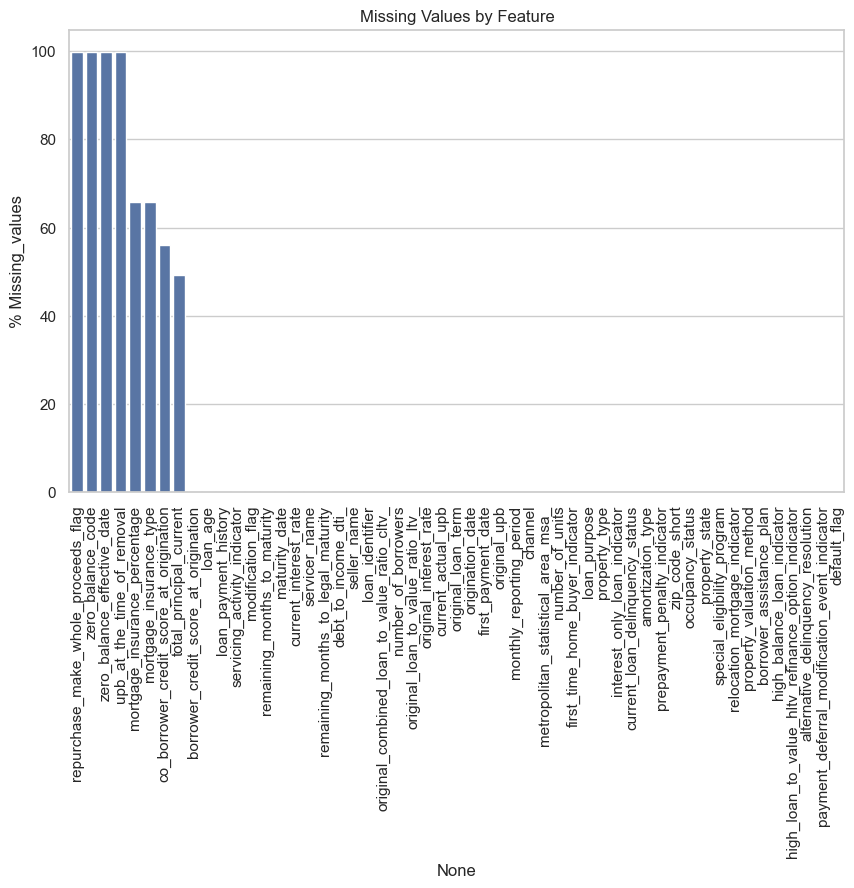

In [7]:
# checking missing values 
missing_count = df.isna().sum().sort_values(ascending=False)
missing_perc = (missing_count/len(df) * 100).round(2)
missing_values = pd.concat([missing_count, missing_perc], axis=1, keys=['count', 'percentage'])

display(missing_values[missing_values['count']>0])

# plot the missing values count
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values['percentage'])
plt.xticks(rotation=90)
plt.ylabel("% Missing_values")
plt.title("Missing Values by Feature")
plt.show()

### 📌  Observations

1. High missing (~99.98%) => **repurchase_make_whole_proceeds_flag, zero_balance_code, zero_balance_effective_date, upb_at_the_time_of_removal** --> These columns are almost completely empty so we can drop them from analysis.

2. High missing (~65.70 %) => **mortgage_insurance_percentage, mortgage_insurance_type** --> more than half missing, consider dropping or retaining only as a flag. review based on the predicate distribution.

3. Moderate missing (~56.0%) => **co_borrower_credit_score_at_origination** --> more than half missing, drop or create a co-borrower flag rather than having raw score with missing fields.

4. Moderate missing (~49.3%) => **total_principal_current** --> below half missing, can apply imputation with median or investigate the missing patterns based on distribution.


default_flag
0    506032
1      2249
Name: count, dtype: int64
default_flag
0    0.995575
1    0.004425
Name: proportion, dtype: float64


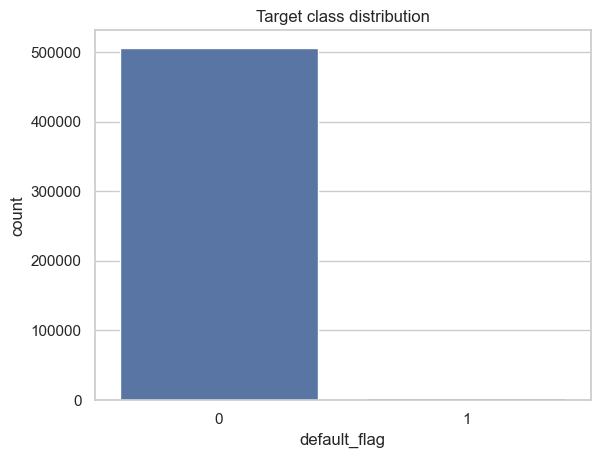

In [8]:
# checking the target label distribution

print(df['default_flag'].value_counts())
print(df['default_flag'].value_counts(normalize=True))

sns.countplot(x=df['default_flag'], data=df)
plt.title("Target class distribution")
plt.show()

### 📌  Observations

=> The default class is extremely rare, fewer than one in 200 loans 

**Modeling implications** <br>
**1. Sampling Strategy** <br>
&emsp; -> consider techniques  <br>
&emsp;&emsp;&emsp;a. oversampling the default cases (Eg. SMOTE) <br>
&emsp;&emsp;&emsp;b. Undersampling the majority class

**2. Evaluation Metrics** <br>
&emsp;->Since default is extremly rare with ~0.44%, Accuracy will be misleading (model will score ~99% ) <br>
&emsp;->Look for the metrics that focus on the minority class like precision, recall, f1-score (esp f1 score for class "1") or AUC .

**3. Algorithm weighting** <br>
&emsp;-> Use class weights like scale_pos_weight in XGBoost to penailize the misclassifying default more heavily.


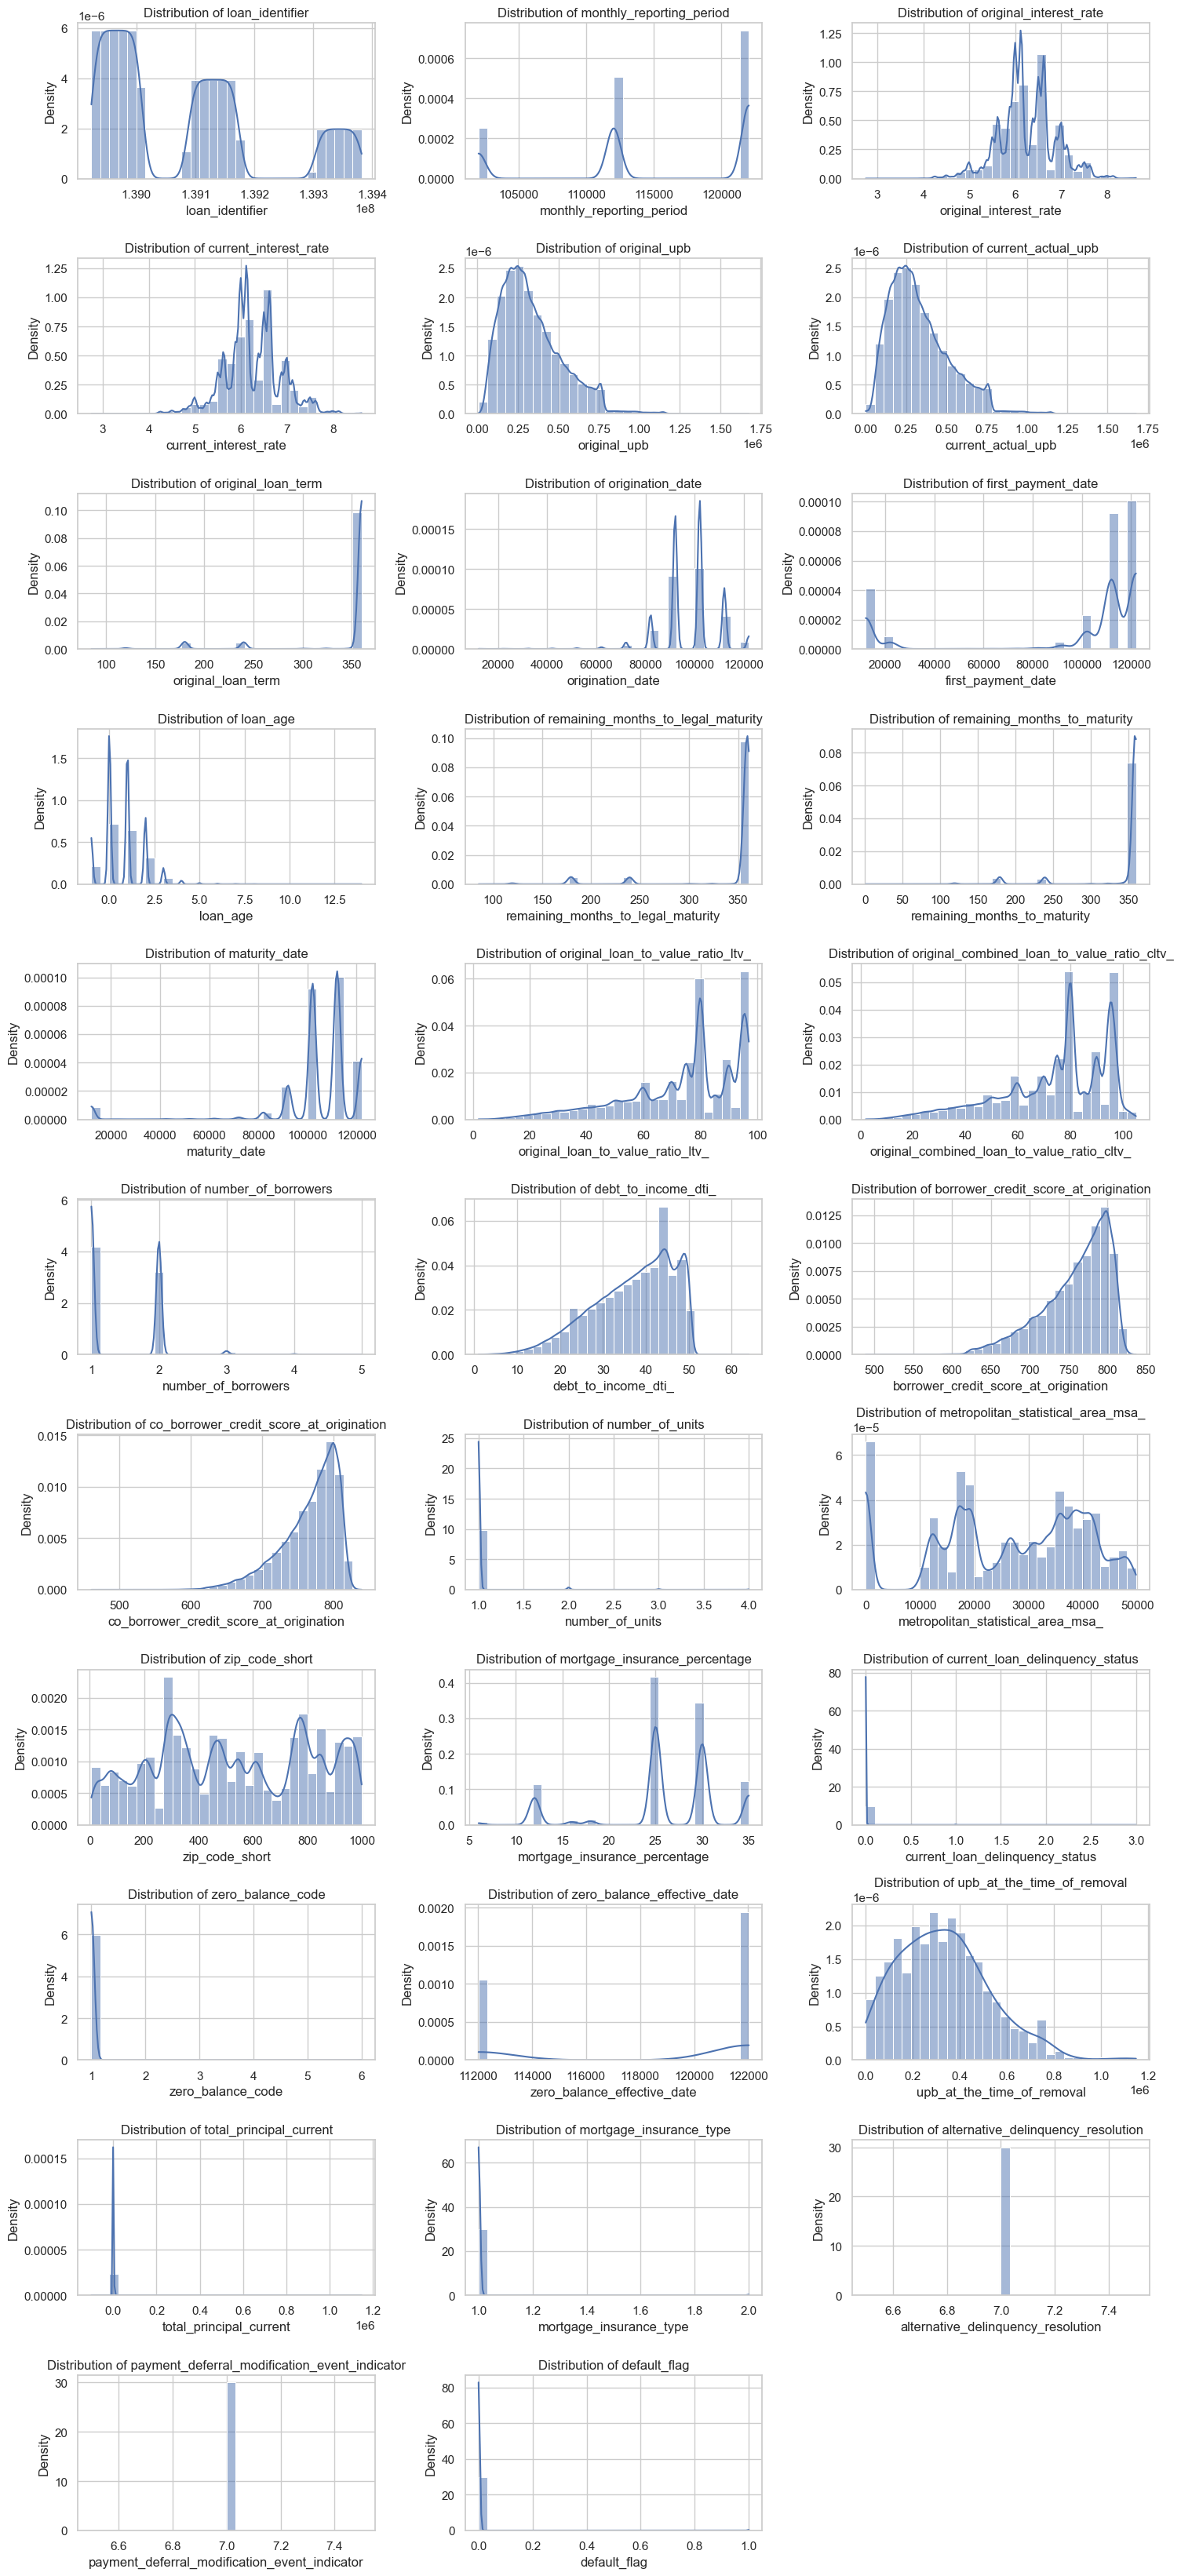

In [10]:
# do univariate analysis

# for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def create_subplot(n, ncols=3, figsize_base = (5,3)):
    rows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(rows, ncols, figsize=(ncols*figsize_base[0], rows*figsize_base[1]))
    axes = axes.flatten()
    return fig, axes

fig_n, axes_n = create_subplot(len(numeric_cols))
for ax, col in zip(axes_n, numeric_cols):
    sns.histplot(df[col], kde=True, stat='density', bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# Hide any unused subplots
for ax in axes_n[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### 📌  Observations

1. **loan_identifier** -> it has three clusters which is just an ID, No predictive value. DROP <br>
2. **monthly_reporting_period** -> has spikes for few descrete value for that date period which is date encoded as integer. convert to DATETIME and derive month and years.  <br>
3. **original_interest_rate** & **current_interest_rate** -> It has multi-modal distribution arount 6-7 % and small bumps around 5 & 8 %. These are standard mortgage rates, leave as it is, since there is no heavy skewness. <br>
4. **original_upb** & **current_actual_upb** -> Distribution has long right tail indicating heavely positive skew. Apply LOG transform to normalize the distribution.
5. **original_loan_term** -> Just loan duration value of 360 months, check variance, and check for categorical significance else drop.
6. **origination_date** & **first_payment_date** -> monthly reporting period with date format. change to date, years & months. Can treat as flag for time to first payment depending upon the variation.
7. **loan_age** -> loan period. can keep as it is or bucket to range if necessary.
8. **remaining_months_to_legal_maturity** & **remaining_months_to_maturity** -> similar in nature with similar data range with similar meaning to each case,  which makes it redundent. check significanse or drop one.
9. **maturity_date** -> shows date of maturity, convert to DATETIME for month and years.
10. **original_loan_to_value_ratio_ltv** & **original_combined_loan_to_value_ratio_cltv** -> Multi-modal distribution with two peaks at 80 and 100. lenders uses standard ltv buckets, keep numeric or bucket into standard bands if possible.
11. **number_of_borrowers** -> just two peaks showing normal tendency of borrowers count. either drop or check for correlation to keep as binary indicator.
12. **debt_to_income_dti** -> normal distribution with slight skewed to right which can be taken as moderate skewness. no log needed.
13. **borrower_credit_score_at_origination** & **co_borrower_credit_score_at_origination** -> distribution is left skewed and most of the scores lies between 700 to 850. It shows there cutoffs in good credit score, it can be treated as bucket if the distribution allows.
14. **number_of_units** -> there is no variance. DROP
15. **metropolitan_statistical_area_msa** & **zip_code_short** -> Multi modal distribution with clusters. keep it maybe group by region if based on the frequency.
16. **mortgage_insurance_percentage** -> distinct values across the distribution. it has standard MI tiers range, there are missing values, impute or treat as categorical.
17. **current_loan_delquency_status** -> almost all are 0. as most loan are in good standing. we have flag as predicate for this.
18. **zero_balance_code**, **zero_balance_effective_date**, **upb_at_the_time_of_removal**, **total_principal_current** -> nearly all zeros or missing. DROP
19. **mortgage_insurance_type**, **alternative_deliquency_resolution**, **payment_deferral_modification_event_indicator** -> no variance, DROP.
20. **default_flag** -> target variable.    

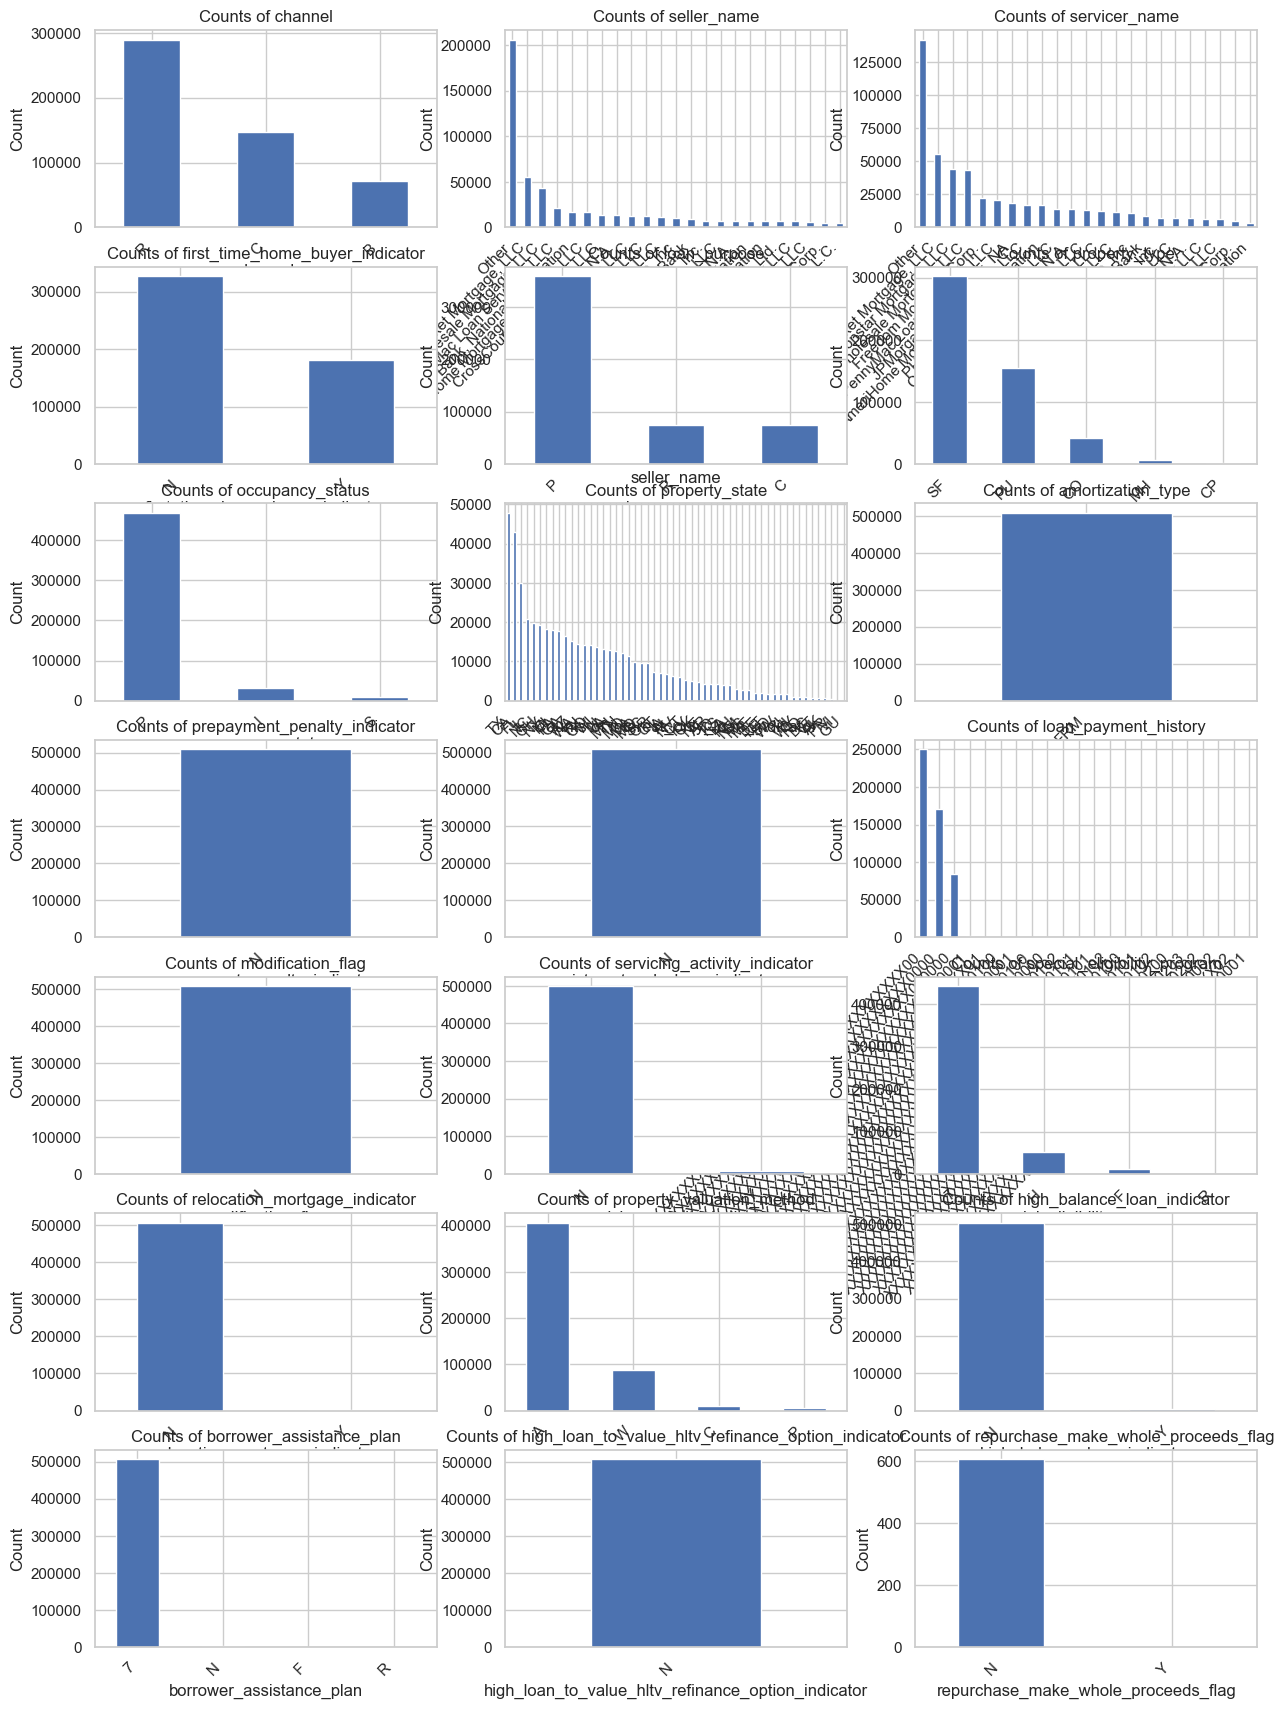

In [11]:
# for catgorical features

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
fig_c, axes_c = create_subplot(len(categorical_cols))
for ax, col in zip(axes_c, categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Counts of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Count')

# Hide unused subplots
for ax in axes_c[len(categorical_cols):]:
    ax.set_visible(False)

plt.show()

### 📌  Observations

1. **channel** -> Three well populated categoris ( Retail, Broker, Correspondent). One-hot encode
2. **seller_name** & **service_name** -> there are almost 60 distinct seller name with long tail after top 5 sellers. there are handful sellers with high counts. Group the sellers into buckets like topN to one-hot encode or target encode those groups.
3. **first_time_home_buyer_indicator** -> two categories first timers and repeat buyers with good distribution. BINARY ENCODE
4. **loan_purpose** -> distribution has three clear category buckets purchase, rate-term refinance and cash-out finance. ONE-HOT ENCODE
5. **property_type** -> 5 categories of property, ONE_HOT ENCODE
6. **occupancy_status** -> almost 90 % distribution is for single family. Check for variantion. DROP
7. **property_state** -> ~50 territories covered, with long tail after top 5. Group by region.
8. **amortization_type**, **prepayment_penalty_indicator** & **interest_only_loan_indicator** -> only one type 
9. **loan_payment_history** -> distinct integer code, one-hot encode.
10. **modification_flag**, **servicing_activity_indicator**, **relocation_mortgage_indicator**, **high_balance_loan_indicator**, **borrower_assistance_plan**, **high_loan_to_value_hltv_refinance_option_indicator**, **repurchase_make_whole_proceeds_flag** -> No variance
11. **special_eligibility_program** -> numerical and alphabetical categories. one-hot encode.
12. **property_valuation_method** -> 4 categories with one dominating method. one-hot encode.



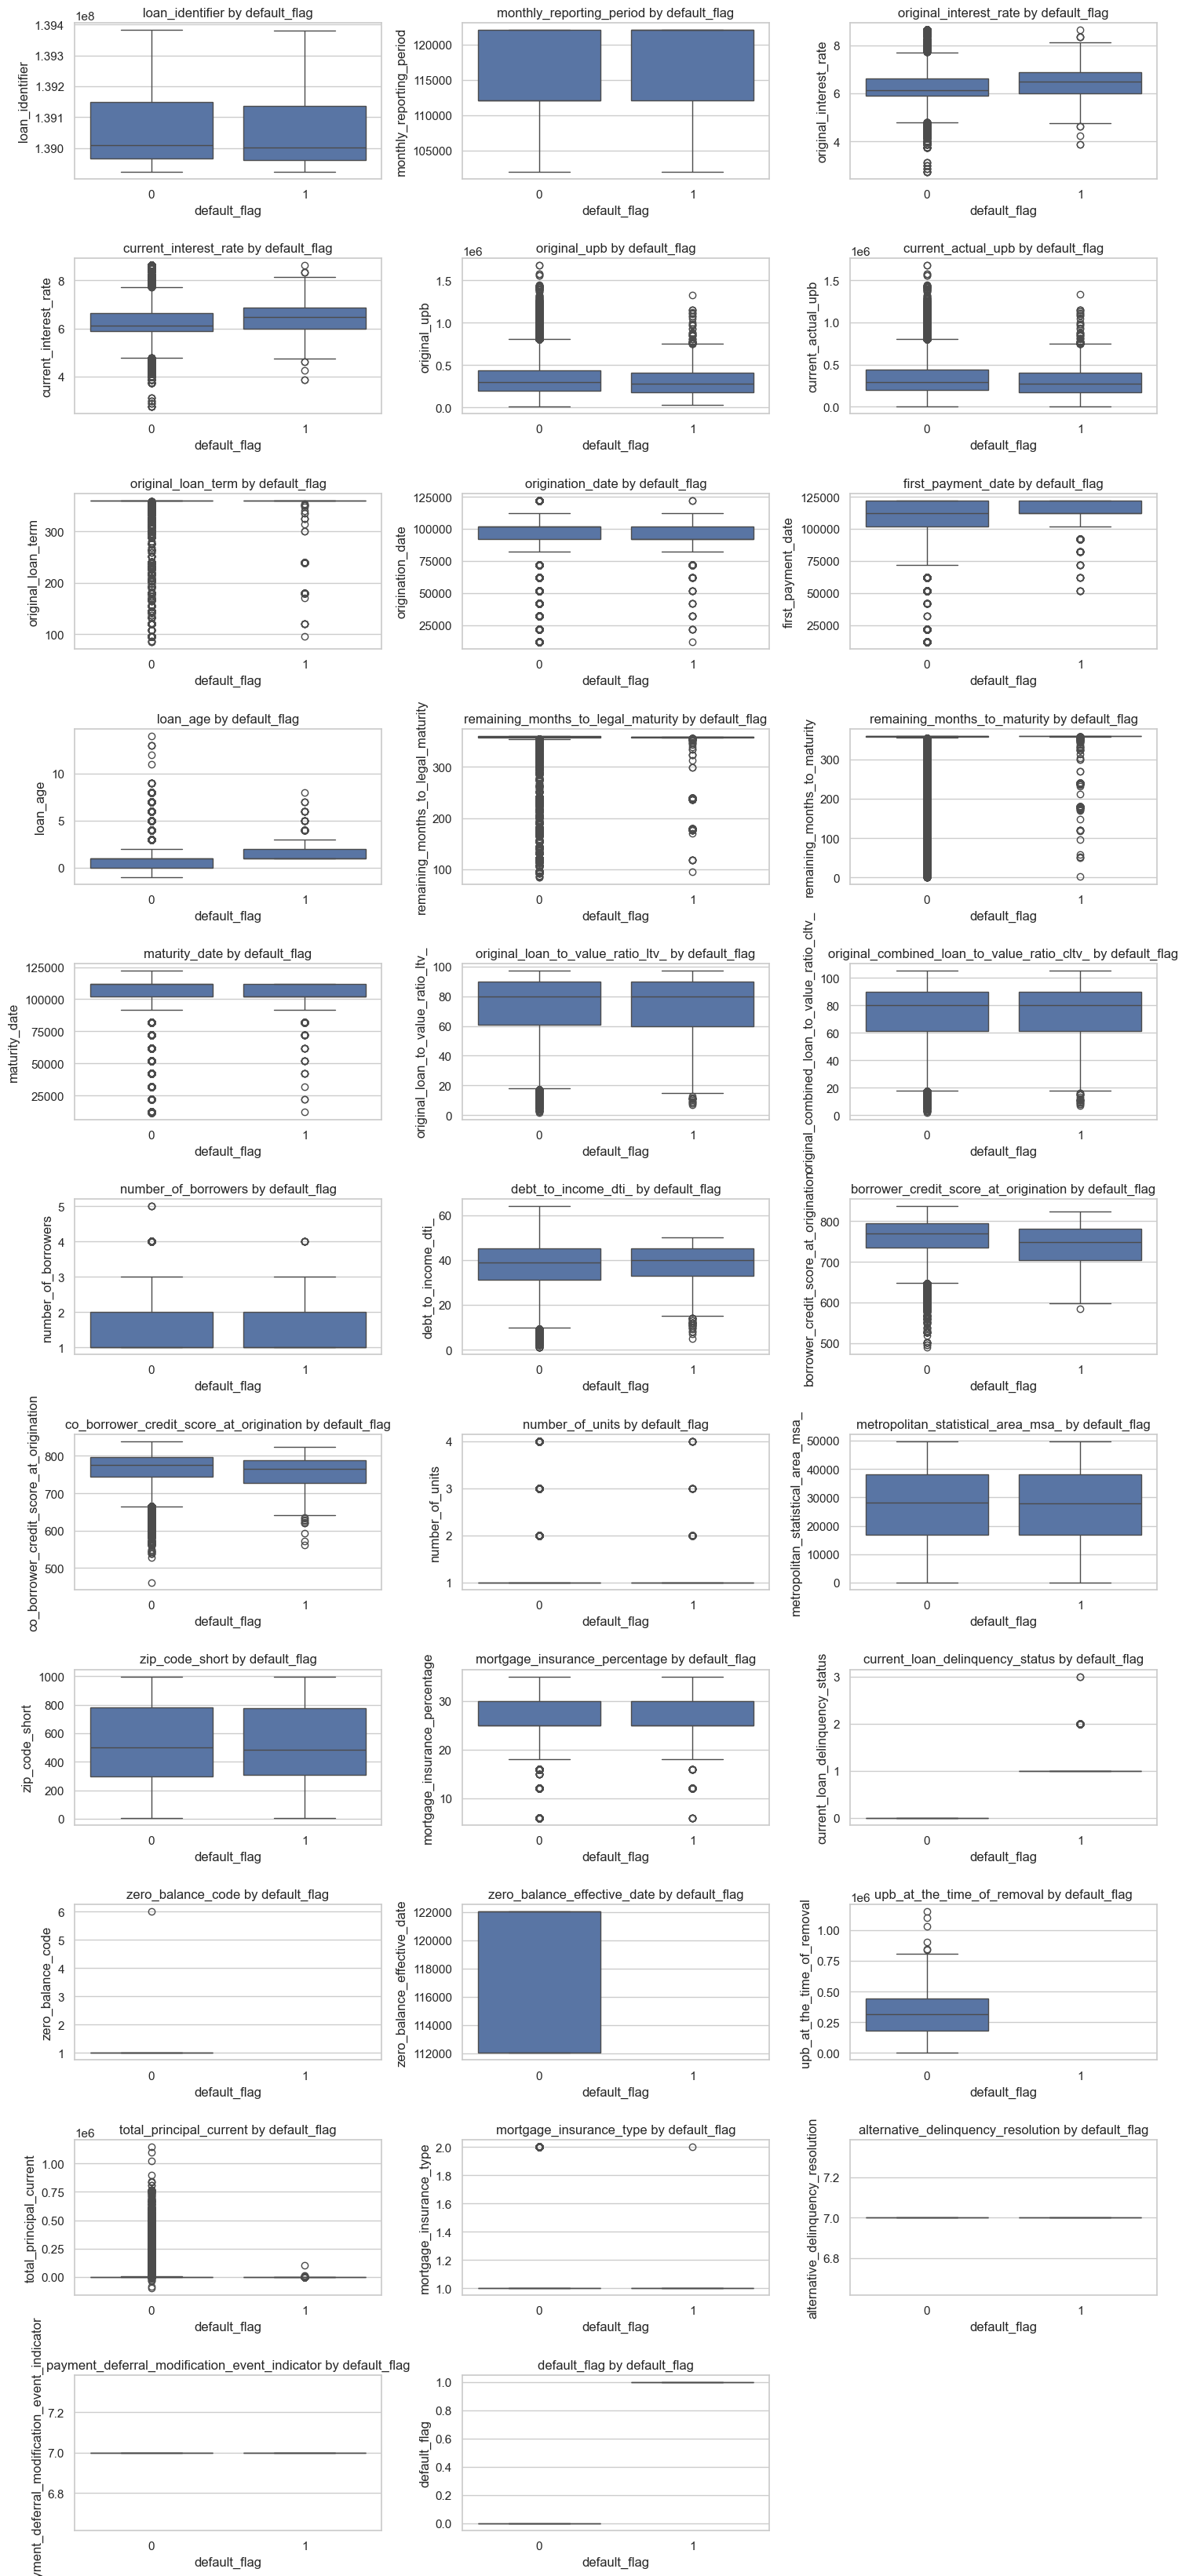

In [15]:
# bivariate analysis

fig_b_n, axes_b_n = create_subplot(len(numeric_cols))
for ax, col in zip(axes_b_n, numeric_cols):
    sns.boxplot(x=df['default_flag'], y=col, data=df, ax=ax)
    ax.set_title(f"{col} by default_flag")

# Hide unused axes
for ax in axes_b_n[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### 📌  Observations

**Features with no real seperation** <br>
1. Date field (being encoded to DATETIME) <br>
&emsp;&emsp; **monthly_reporting_period**, **first_payment_date**, **origination_date**, **maturity_date**, **zero_balance_effective_date** <br>
2. Loan idenditifier -> little to no predictive signal <br>
3. Redundant or near constant metrics <br>
&emsp;&emsp; **original_loan_term**, **remaining_months_to_maturity**, **number_of_borrowers**, **number_of_units**, **zip_code_short**, **mortgage_insurance_type**, **alternative_delinquency_resolution**, **payment_deferral_modification_event_indicator** <br>
<br>

**Features with moderate signals** <br>
The median has a slight shift but not too drastic as there's still a heavy overlap. Can normalize or bucket to the group. <br>
1. loan size & age <br>
&emsp; **original_upb**, **current_actual_upb**, **loan_age**, **remaining_months_to_legal_maturity** <br>

2. Geography <br>
&emsp; **metropolitan_statistical_area_msa** <br>

3. Other <br>
&emsp; **maturity_date** <br>
<br>

**Features with strong signals**
1. **original_interest_rate** -> Has higher median, with wide range, can group into numeric bucket<br>
2. **current_interest_rate** -> similar shift compared to original interest rate, it has slightly higher for defaulters, treat similar to original interest rate<br>
3. **debt_to_income_dti** -> there is noticeable higher median with defaulter having the higher one. if needed standardize<br>
4. **borrower_credit_score_at_origination** -> Lower credit score for defaulters with lower tail reacing to ~500, bucket grouping<br>
5. **co_borrower_credit_score_at_origination** -> only slight lower than compared to borrower credit score, treat similar to borrower credit score<br>
6. **original_loan_to_value_ratio_ltv** -> defaulters skewed toward higher end <br>
7. **original_combined_loan_to_value_ratio_cltv** similar tendency to original loan to value-> <br>
8. **current_loan_deliquency_status** -> defaulters have higher deliquency code, extreme outliers check for dropping or lagging the outliers<br>


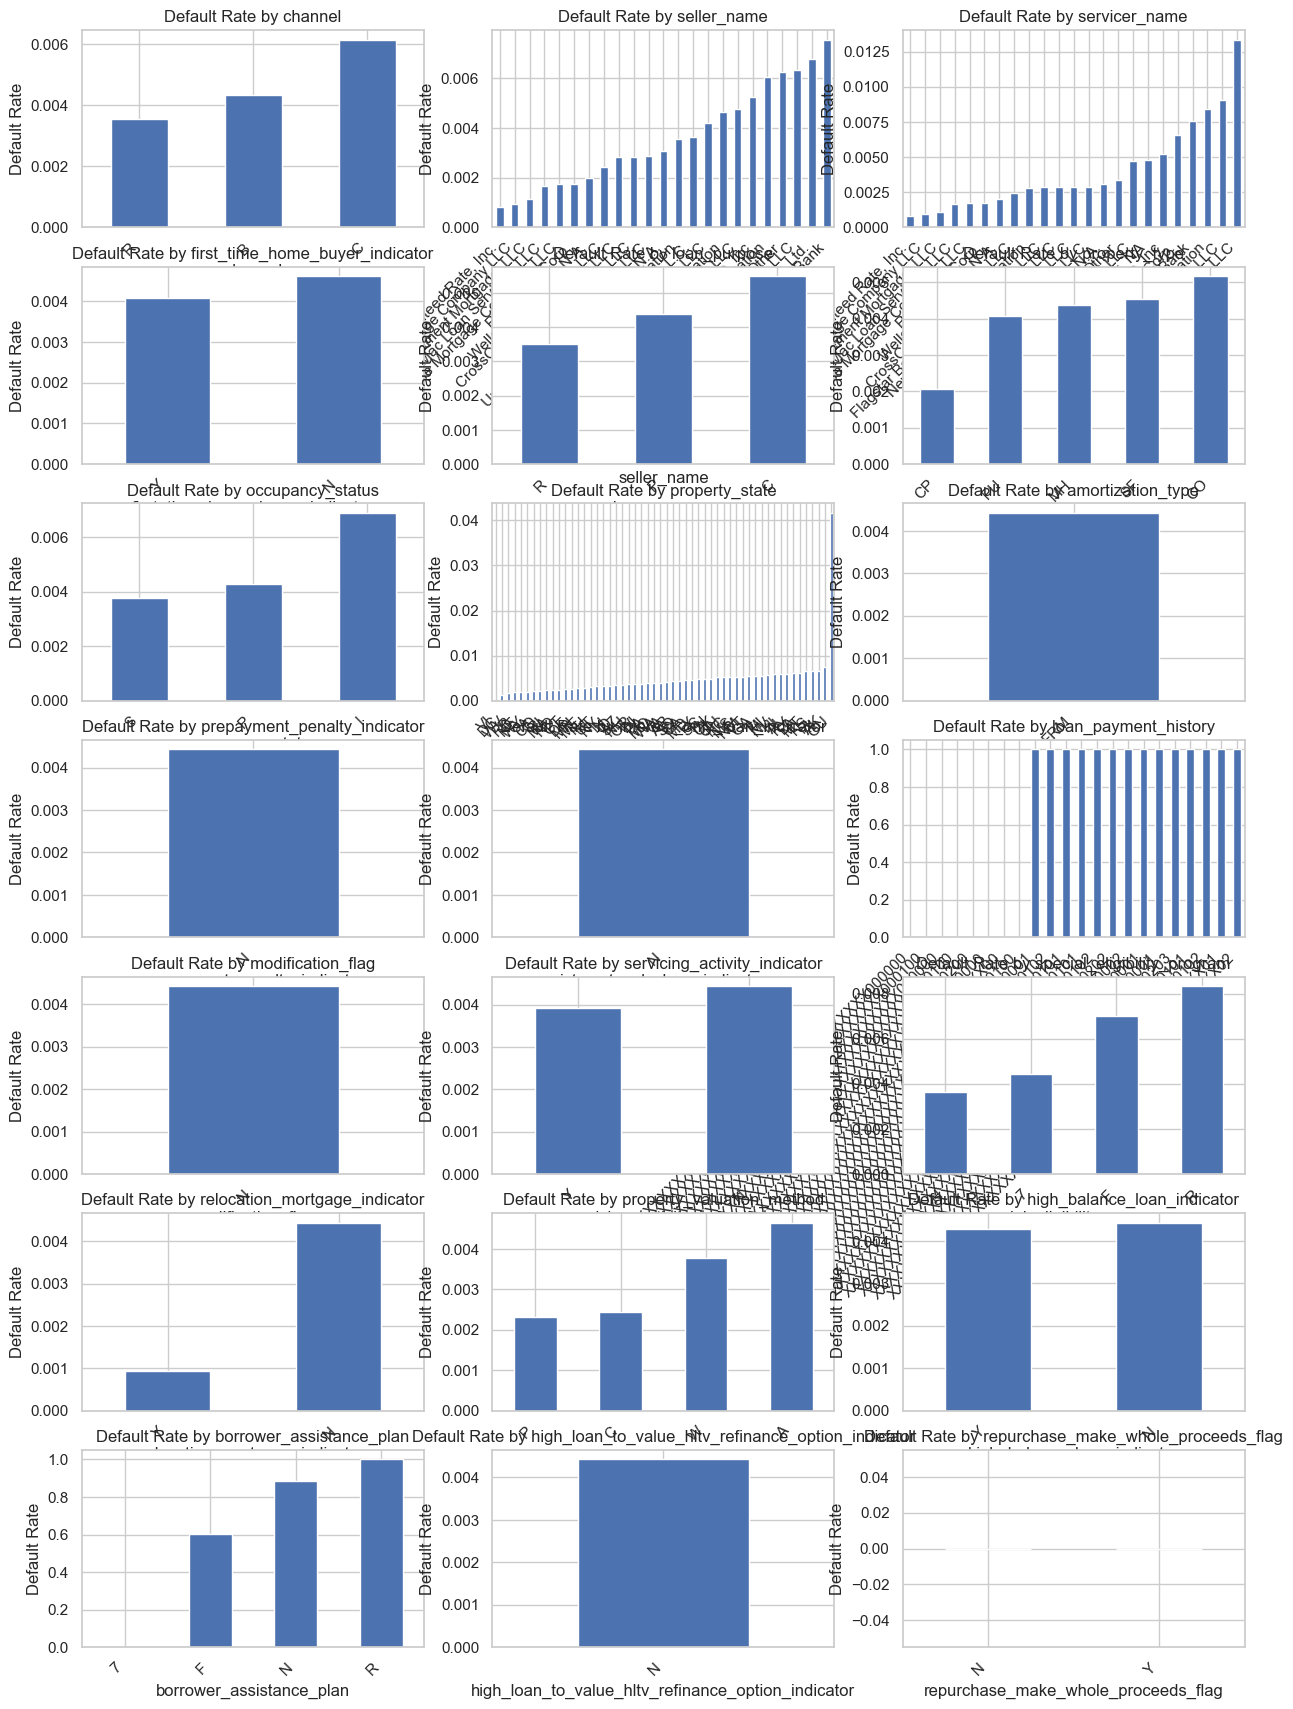

In [20]:
# categorical 

fig_b_c , axes_b_c = create_subplot(len(categorical_cols))

for ax, col in zip(axes_b_c, categorical_cols):
    rates = df.groupby(col)['default_flag'].mean().sort_values()
    rates.plot(kind='bar', ax=ax)
    ax.set_title(f"Default Rate by {col}")
    ax.set_ylabel("Default Rate")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide unused axes
for ax in axes_b_c[len(categorical_cols):]:
    ax.set_visible(False)

plt.show()

### 📌  Observations

**1. No predictive Signal - can DROP the columns** <br>
&emsp; &emsp; These shows virtually identical default rates across the categories -> **modification_flag**, **servicing_activity_indicator**, **repurchase_make_whole_proceeds_flag**, **high_loan_to_value_hltv_refinance_option_indicator** <br>
<br>

**2. Moderate Signal (either keep it or have one-hot encodding)** <br>
&emsp;&emsp; These have small but meaningful differences, treating them as low to mid level priority. -> **channel**, **first_time_home_buyer** and **prepayment_penalty** <br>
<br>

**3. Strong Signal (keep those with target or one-hot encoding)** <br>
&emsp;&emsp; These features have largest spreads and likely to be one of top predictors for out model. -> **seller_name**, **service_name**, **loan_purpose**, **property_type**, **occupancy_status** and **property_state**

lets  check for the relation the have with each other through correlation heatmap 

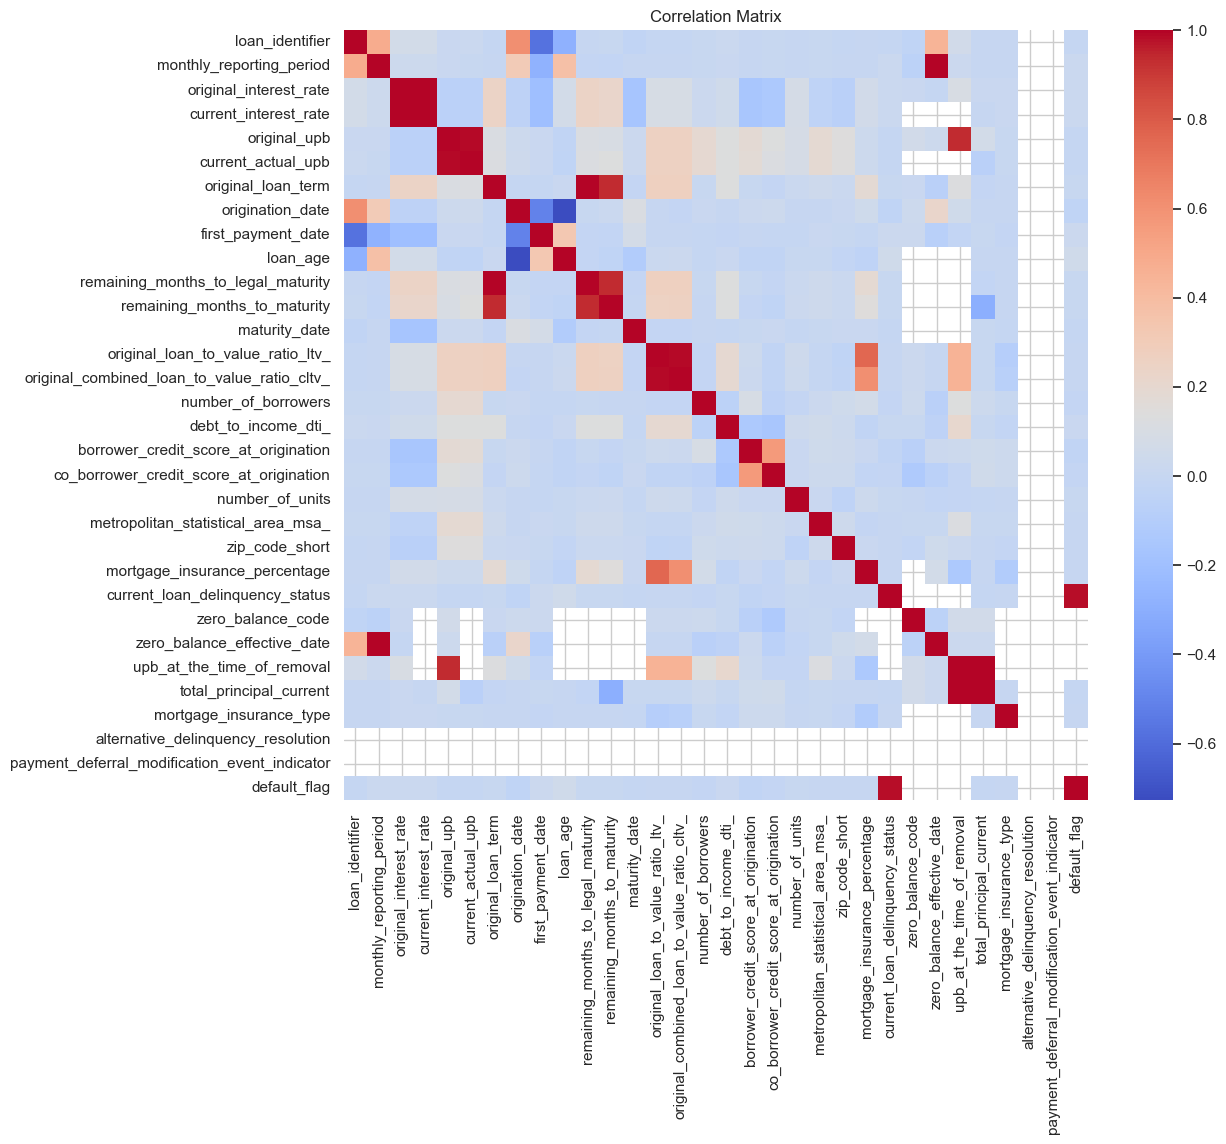

In [21]:
# correlation of numerical columns

corr_n = df[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_n, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 📌  Observations

There are highely correlated pairs which basically repeats the same story twice to the models. They act as redundent features for the model and can hurt while running the model. Basically it will just confuse the model run's interpretability with multicollinearility (inflates variance) and introduces model complexity and overfitting. <br>
listing them so check if we can drop atleast one of them to reduce redundancy in the dataset before going for feature engineering.

**1. ororiginal_upb <-> current_actual_upb** <br> 
**2. original_upb <-> total_principal_current** <br> 
**3. original_loan_term <-> remaining_months_to_legal_maturity** <br> 
**4. original_loan_term <-> remaining_months_to_maturity** <br> 
**5. borrower_credit_score_at_origination <-> co_borrower_credit_score_at_origination** <br> 
**6. original_loan_to_value_ratio_ltv <-> original_combined_loan_to_value_ratio_cltv** <br> 
**7. monthly_reporting_period <-> zero_balance_effective_date** <br> 
**8. upb_at_the_time_of_removal <-> original_upb** <br> 

<br>

**Correlation with the target**
All numeric features have very low corr value with default_flag, confirming that a simple linear correlation model will not capture the required predictive power. We need to review non-linear models.

### Overall summary for all features with possible action for feature engineering step considering the results of Exploratory Data Analysis 

| Feature                                                       | Action                                                                                             |
| ------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **loan\_identifier**                                          | Drop                                                                                               |
| **monthly\_reporting\_period**                                | Convert to datetime (`YYYYMM`→datetime), derive month/year or “months since origination”; drop raw |
| **origination\_date**                                         | Convert to datetime, derive “months since origination”; drop raw                                   |
| **first\_payment\_date**                                      | Convert to datetime, derive “time to first payment”; drop raw                                      |
| **maturity\_date**                                            | Convert to datetime, derive “remaining life”; drop raw                                             |
| **zero\_balance\_effective\_date**                            | drop (99% missing)                                                            |
| **original\_upb**                                             | Log standarization                                                |
| **current\_actual\_upb**                                      | Drop or combine via `delta_upb = log(cur) - log(orig)`                                             |
| **total\_principal\_current**                                 | Drop                                                                                               |
| **upb\_at\_the\_time\_of\_removal**                           | Drop                                                                                               |
| **original\_interest\_rate**                                  | Keep numeric or bucket (`<5.5%`, `5.5–6.5%`, `>6.5%`)                                              |
| **current\_interest\_rate**                                   | Same as above                                                                                      |
| **original\_loan\_term**                                      | Drop or flag binary (`term == 360`)                                                                |
| **loan\_age**                                                 | Keep; optional bucket (`0–2`, `2–5`, `>5` years)                                                   |
| **remaining\_months\_to\_legal\_maturity**                    | Drop (multicollinear with term/age)                                                                |
| **remaining\_months\_to\_maturity**                           | Same as above                                                                                      |
| **debt\_to\_income\_dti**                                     | Keep; standardize                                                                                  |
| **borrower\_credit\_score\_at\_origination**                  | Keep; bucket (`<650`, `650–720`, `>720`)                                                           |
| **co\_borrower\_credit\_score\_at\_origination**              | Drop or create flag (`has_co_borrower_score`)                                                      |
| **number\_of\_borrowers**                                     | Drop                                                                                               |
| **number\_of\_units**                                         | Drop                                                                                               |
| **metropolitan\_statistical\_area\_msa**                      | Frequency or target-encode                                                                         |
| **zip\_code\_short**                                          | Drop or group into regions + encode                                                                |
| **mortgage\_insurance\_percentage**                           | Impute missing→“None”, treat as categorical (one-hot)                                              |
| **mortgage\_insurance\_type**                                 | Drop                                                                                               |
| **current\_loan\_delinquency\_status**                        | Drop (leaks future info)                                                                           |
| **modification\_flag**                                        | Drop                                                                                               |
| **servicing\_activity\_indicator**                            | Drop                                                                                               |
| **relocation\_mortgage\_indicator**                           | Drop                                                                                               |
| **high\_balance\_loan\_indicator**                            | Drop                                                                                               |
| **borrower\_assistance\_plan**                                | Drop                                                                         |
| **high\_loan\_to\_value\_hltv\_refinance\_option\_indicator** | Drop                                                                                               |
| **repurchase\_make\_whole\_proceeds\_flag**                   | Drop                                                                                               |
| **alternative\_delinquency\_resolution**                      | Drop                                                                                               |
| **payment\_deferral\_modification\_event\_indicator**         | Drop                                                                                               |
| **channel**                                                   | One-hot encode (R, B, C)                                                                           |
| **seller\_name**                                              | Group top 5–10 into individual bins, “Other” for rest; then one-hot or target-encode               |
| **servicer\_name**                                            | Same grouping strategy as `seller_name`                                                            |
| **first\_time\_home\_buyer\_indicator**                       | Binary encode (Y→1, N→0)                                                                           |
| **loan\_purpose**                                             | One-hot encode (Purchase, Refinance, Cash-out, \[Other])                                           |
| **property\_type**                                            | One-hot main types (SFR, Condo, PUD), collapse rest into “Other”                                   |
| **occupancy\_status**                                         | Binary encode (Investor vs. Owner-occupied)                                                        |
| **amortization\_type**                                        | Binary encode (C vs. F), or drop if extremely imbalanced                                           |
| **prepayment\_penalty\_indicator**                            | Binary encode (Y/N)                                                                                |
| **loan\_payment\_history**                                    | Drop (100% default for >2 lates; leakage)                                                          |
| **property\_state**                                           | Target-encode or group into high/low-risk regions                                                  |
| **property\_valuation\_method**                               | Binary/one-hot encode (P vs. O)                                                                    |
